# 原理与推导
贝叶斯分类算法的基本原理就是利用贝叶斯公式根据某特征的先验概率计算出其后验概率，然后选择具有最大后验概率作为该特征所属的类。之所以称之为“朴素”，是因为贝叶斯分类只做最原始、最简单的假设：所有的特征之间是相对独立的。
## 极大似然估计
就是利用已知的样本结果信息，反推最具有可能（最大概率）导致这些样本结果出现的模型参数值！

## 贝叶斯公式
条件概率公式：
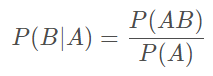
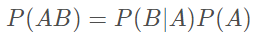
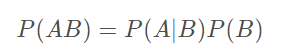
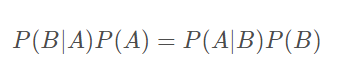
可以推出贝叶斯公式：
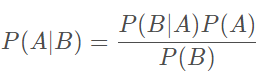

## 朴素贝叶斯
朴素贝叶斯分类器(Naïve Bayes Classifier)采用了“属性条件独立性假设”(attribute conditional independence assumption)：每个属性独立地对分类结果发生影响。
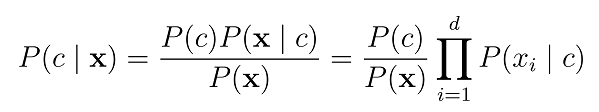
朴素贝叶斯分类器的表达式
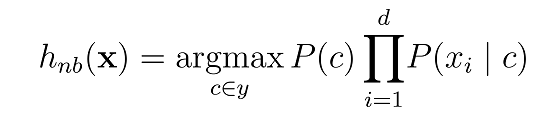

## 朴素贝叶斯种类
高斯朴素贝叶斯、多项式朴素贝叶斯和伯努利朴素贝叶斯。
### 高斯朴素贝叶斯
在处理连续数据的分类时，我们通常选用高斯朴素贝叶斯算法。Gaussian NB就是先验概率为高斯分布的朴素贝叶斯。假设每一个特征的数据都服从高斯分布。
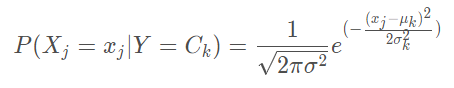
其中，Ck是Y的第k个类别，μ和σ为训练集的均值和标准差。
### 多项式朴素贝叶斯
多项式朴素贝叶斯就是先验概率为多项式分布的朴素贝叶斯。假设特征是由一个简单多项式分布生成的。多项式分布可以描述各种类型样本出现次数的概率，因此多项式朴素贝叶斯非常适合用于描述出现次数或者出现次数比例的特征。该模型常用于文本分类，特征值表示的是次数。公式如下：
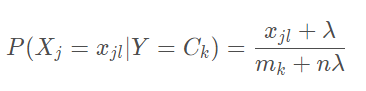
其中，p(Xj=xjl|Y=Ck)是第k个类别的第j维特征的第l个取值的条件概率。mk是训练集中输出为第k类的样本个数。 n为数据的维度，λ是一个大于0的常数，当λ=1是，为拉普拉斯平滑。
### 伯努利朴素贝叶斯
伯努利朴素贝叶斯就是先验概率为伯努利分布的朴素贝叶斯。假设特征的先验概率为二元博独立分布。
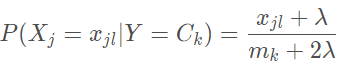
在伯努利模型中，每个特征的取值只有True和False。在文本分类中，就是一个特征有没有出现在一个文档中。

# 代码实现
鸢尾花、西瓜3.0数据集

## 导入数据集

In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# 导入模块
import numpy as np
import pandas as pd
import random
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats

In [15]:
# 数据集导入
## 加载鸢尾花数据集
dataset_iris = datasets.load_iris()
print('\n1、Describe of iris dataset:\n{}'.format(dataset_iris['DESCR'][:193] + '\n...'))
print('\n2、Target names of iris dataset:\n{}'.format(dataset_iris.target_names))
print('\n3、Feature names of iris dataset:\n{}'.format(dataset_iris.feature_names))

X_iris = dataset_iris.data
y_iris = dataset_iris.target

## 数据标准化处理
dataset_normalizer = StandardScaler().fit(X_iris)
X_iris = dataset_normalizer.transform(X_iris)

x_iris_train,x_iris_test,y_iris_train,y_iris_test=train_test_split(X_iris, y_iris, random_state=1)


1、Describe of iris dataset:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...

2、Target names of iris dataset:
['setosa' 'versicolor' 'virginica']

3、Feature names of iris dataset:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [41]:
## 加载西瓜3.0数据集
dataset_watermelon3 =pd.read_csv('Watermelon3.0.csv',header = 0)
dataset_watermelon3

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
0,1,2,2,2,1,3,1,0.697,0.460,1
1,2,3,2,3,1,3,1,0.744,0.376,1
2,3,3,2,2,1,3,1,0.634,0.264,1
3,4,2,2,3,1,3,1,0.608,0.318,1
4,5,1,2,2,1,3,1,0.556,0.215,1
5,6,2,1,2,1,2,2,0.403,0.237,1
6,7,3,1,2,2,2,2,0.481,0.149,1
7,8,3,1,2,1,2,1,0.437,0.211,1
8,9,3,1,3,2,2,1,0.666,0.091,0
9,10,2,3,1,1,1,2,0.243,0.267,0


## 构建朴素贝叶斯分类器类

In [48]:
# Naïve Bayes Classifier
class NBC(object):
    def __init__(self):
        self.Pc = {}    # 定义存储先验概率的字典，先验概率表达了样本空间中各类样本所占的比例，可以通过统计他们出现的频率来进行估计
        self.Pxc = {}   # 定义存储条件概率的字典，当已知分类为c时，样本为x的概率，利用训练集数据进行估计
        self.A = 1      # 定义拉普拉斯平滑系数λ=1

        self.all_features = []
        self.bound = None

    # 计算先验概率
    def cal_pc(self, labels):
        labels = list(labels)
        for label in labels:
            self.Pc[label] = (labels.count(label) + self.A) / float(len(labels) + len(np.unique(np.array(labels)))*self.A)

    # 计算条件概率
    def Cal_pxc(self, dataset, bound, labels):
        c_count = labels.value_counts() # 计算样本总数
        labels = list(labels)
        self.all_features = dataset.columns
        self.bound = bound

        if bound is not None:  # 如果存在边界，数据中含有离散和连续
            # 计算离散特征条件概率
            features = dataset.columns[:bound]
            for c in self.Pc.keys():
                c_index = [i for i, label in enumerate(labels) if label == c]   # 分类标签c在labels中的所有索引值index
                c_count = labels.count(c) # 该类标签出现的次数
                for j in range(len(features)): # 遍历所有特征
                    dataset_pkey = np.unique(np.array(dataset[features[j]]))
                    for k in list(dataset_pkey):
                        pkey = str(features[j]) + "=" + str(k) + '|' + str(c)
                        f_index = [i for i, x in enumerate(dataset.iloc[:,j]) if x == k]
                        cf_count = len(set(c_index) & set(f_index))   #x y同时出现的次数
                        self.Pxc[pkey] = (cf_count + self.A) / float(c_count + len(dataset_pkey)*self.A)   #条件概率

            # 计算连续型特征条件概率
            features = dataset.columns[bound:]
            for c in self.Pc.keys():
                c_index = [i for i, label in enumerate(labels) if label == c]   # 分类标签c在labels中的所有索引值index
                c_count = labels.count(c) # 该类标签出现的次数
                for j in range(len(features)): # 遍历所有特征
                    values_mean = np.mean(dataset[features[j]][c_index])
                    values_sacle = np.std(dataset[features[j]][c_index])
                    pkey = str(features[j]) + '|' + str(c)
                    self.Pxc[pkey] = (values_mean, values_sacle)

        else:                       # 如果不存在边界，数据中仅含有一种数据
            features = dataset.columns
            for c in self.Pc.keys():
                c_index = [i for i, label in enumerate(labels) if label == c]  # 分类标签c在labels中的所有索引值index
                c_count = labels.count(c)  # 该类标签出现的次数
                for j in range(len(features)):  # 遍历所有特征
                    values_mean = np.mean(dataset[features[j]][c_index])
                    values_sacle = np.std(dataset[features[j]][c_index])
                    pkey = str(features[j]) + '|' + str(c)
                    self.Pxc[pkey] = (values_mean, values_sacle)

    # 训练模型
    def fit(self, dataset, bound, labels): # 如果数据为离散连续混合，则分开计算。如果没有混合，bound = None
        self.cal_pc(labels)
        self.Cal_pxc(dataset, bound, labels)

    # 结果预测
    def predict(self,data):
        output = []
        for c in self.Pc.keys():
            for j in range(len(self.all_features)):  # 遍历所有特征
                if self.bound is not None:
                    if j < self.bound:
                        pkey = str(self.all_features[j]) + "=" + str(data[j]) + '|' + str(c)
                        if j == 0:
                            output_ = self.Pxc[pkey]
                        else:
                            output_ *= self.Pxc[pkey]
                    else:
                        pkey = str(self.all_features[j]) + '|' + str(c)
                        pro = stats.norm.pdf(data[j], float(self.Pxc[pkey][0]), float(self.Pxc[pkey][1]))
                        output_ *= pro
                else:
                    pkey = str(self.all_features[j]) + '|' + str(c)
                    pro = stats.norm.pdf(data[j], float(self.Pxc[pkey][0]), float(self.Pxc[pkey][1]))
                    if j==0:
                        output_ = pro
                    else:
                        output_ *= pro

            output_ = self.Pc[c] * output_
            output.append(output_)
        return output, output.index(max(output))

In [49]:
# 实例化朴素贝叶斯类
MY_NBC = NBC()

# 训练
MY_NBC.fit(dataset_watermelon3.iloc[:,1:9], 6, dataset_watermelon3.iloc[:,-1])

In [50]:
# 准备训练集数据并预测分类
# data = [2, 2, 2, 1, 3, 1, 0.697, 0.46]
data = [2,3,1,1,1,2,0.243,0.267]

output, label = MY_NBC.predict(data)

print(label)

1
